# **Analiza danych i symulacje w języku Python**

## **Projekt: Grupowanie nienadzorowane klientów centrum handlowego do opracowania modelu nadzorowanego dla indywidualnych ofert handlowych**

Studia Podyplomowe Inżynieria Danych - Big Data, SGH

10 maja 2020

#### *Autorzy:*
`Mateusz Jęczarek,
Bartosz Marcinkowski,
Michał Oziębło`

![alt text](https://p0.pxfuel.com/preview/251/125/143/shopping-mall-shopping-centre-consumption.jpg)

In [0]:
# zmiana szerokości konternera/komórek notebooka
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#### *Opis problemu badawczego:*
`Zbiór danych zawiera podstawowe dane na temat klientów centrum handlowego.
Za pomocą uczenia nienadzorowanego metodą klastrowania K-średnich zostaną oni przypisani do grup. 
Grupy te następnie zostaną zinterpretowane, a informacje te posłużą do napisania modelu nadzorowanego klasyfikacji (drzewa i lasy losowe), pozwalajacego na dopasowanie indywidualnych ofert handlowych zgodnych z preferencjami danego klienta.`

#### *Opis zbioru danych:*
`Zbiór danych zawiera informacje o wieku, płci, rocznym dochodzie oraz miarę popytu, zależną od deklarowanej w ankietach wartości zakupów podczas wizyty.`

`Źródło:` [`Zbiór danych`](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python?fbclid=IwAR2wjzN4v4Ot8ESuNtKYfnGSPKjHQ7WwEe7LXGY0Ovlw6ahLbpi8iS4SWts#Mall_Customers.csv)

#### *Algorytmy zastosowane w projekcie:*

**K-means clustering (algorytm klastrowania k-średnich)** - każda grupa jest reprezentowana przez prototyp stanowiący centroid (wartość średnią) podobnych punktów o cechach ciągłych, albo medoid (najbardziej reprezentatywny lub najczęściej występujący punkt) w przypadku cech kategoryzujących. Algorytm próbuje podzielić obserwacje na k grup, z których każda ma podobną wariancję.
Działanie można opisać w 5 krokach:

>1. Punkty „środkowe” są tworzone w losowo wybranych miejscach.
2. Dla każdej obserwacji obliczana jest odległość między obserwacją, a punktami środkowymi k.
3. Dla każdej obserwacji obserwacja zostaje przypisana do klastra, którego punkt środkowy znajduje się najbliżej.
4. Punkty środkowe są przenoszone na środek odpowiadających im klastrów.
5. Kroki 2-4 są powtarzane, dopóki żadna obserwacja nie zmienia klastra. Na tym etapie algorytm zostaje uznany za zbieżny i kończy działanie.<br/>

Do najważniejszych zalet tego typu rozwiązania należy uznać łatwą implementację.
Natomiast największą wadą jest konieczność odgórnego zdefiniowania liczby klastrów k. Niewłaściwy dobór parametru k to w efekcie niska skuteczność algorytmu.

**Elbow method (Metoda łokcia)** - funkcja sumy kwadratów błędów pozwalająca na porównanie skuteczności różnych klasteryzacji metodą centroidów. Oblicza sumę błędów kwadratowych wewnątrz klastra dla różnych wartości parametru k i wybiera jego wartość, dla której ta suma zaczyna się zmniejszać. Na wykresie jest to widoczne jako "łokieć".<br/>

Największą zaletą metody jest jej prostota. Natomiast największą wadą jest jego wrażliwość na dane przez co określenie ilości optymalnej liczby klastrów może być niejednoznaczne.

**The Silhouette method** - Mierzy jak punkt jest podobny do własnego klastra w porównaniu do innych klastrów. Zakres wartości dla miary zawiera się w skali od (-1, 1). Gdzie wartość bliska 1 wskazuje, że punkt jest umieszczony we właściwej grupie. Jeśli wiele punktów ma ujemną wartość, może to oznaczać, że utworzonych zostało za dużo lub za mało klastrów.<br/>

The Silhouette method nie należy rozumieć jako alternatywnej metody do metody łokcia, ponieważ metodę łokcia należy rozpatrywać jako decyzyjną, podczas gdy Silhouette jest metodą służącą do sprawdzenia poprawności grupowania.

**Drzewa decyzyjne** - to graficzna metoda wspomagania procesu decyzyjnego - za pomocą algorytmu decyzyjnego, tworzony jest korzeń drzewa i rozdzielane są dane wobec cechy mającej największy przyrost informacji. Poprzez wielokrotne iteracje można powtarzać procedurę rozdzielania danych w każdym potomnym węźle, aż uzyskane zostaną same liście. Oznacza to, że wszystkie próbki w danym węźle przynależą do tej samej klasy. 

Niestety utworzenie optymalnego drzewa decyzyjnego dla treningowego zbioru danych jest procesem wysoce złożonym pod względem charakteru obliczeń. Istnieje także duże ryzyko zbudowania drzewa nadmiernie dopasowanego (przeuczonego) względem treningowego zbioru danych, które nie potrafią tworzyć uogólnień podczas przetwarzania nowych danych.

**Lasy losowe** - są odpowiedzią na uniknięcie problemu zbyt mocnego dopasowania drzew decyzyjnych do danych treningowych (mających tendencję do tzw. przeuczenia). 
Metoda ta polega na tworzeniu wielu drzew decyzyjnych i pozwoleniu im na wybór sposobu klasyfikacji danych wejściowych w drodze głosowania. Dochodzi do tego poprzez wytrenowanie wielu drzew decyzyjnych, przy czym każde z nich otrzymuje tylko próbki początkowe obserwacji, a każdy węzeł analizuje jedynie podzbiór cech podczas wybierania najlepszego sposobu rozgałęzienia. 

Lasy losowe są sposobem uśredniania wielu głębokich drzew decyzyjnych, wyszkolonych na różnych częściach tego samego zestawu treningowego, celem zmniejszenia wariancji. Odbywa się to kosztem niewielkiego wzrostu obciążenia i pewnej utraty interpretowalności, ale zwiększa wydajność w ostatecznym modelu.


###### **Krok 1: Import pakietów**

In [1]:
# import pakietów wykorzystanych w projekcie:
import numpy as np # https://numpy.org/devdocs/
import pandas as pd # https://pandas.pydata.org/about/
import math # https://docs.python.org/3/library/math.html
import matplotlib.pyplot as plt # https://matplotlib.org/tutorials/introductory/pyplot.html
from matplotlib.pyplot import figure # https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.figure.html
import plotly.express as px # https://plotly.com/python/plotly-express/
import scipy # https://www.scipy.org/about.html # zawiera pandas
import random # https://docs.python.org/3/library/random.html
from random import gauss
from sklearn.cluster import KMeans # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
import copy # https://www.geeksforgeeks.org/copy-python-deep-copy-shallow-copy/
from sklearn.metrics import (silhouette_score,
                             accuracy_score) # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
                             #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
from scipy.cluster.hierarchy import (linkage, 
                                     fcluster, 
                                     dendrogram) # https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
import seaborn as sns # https://seaborn.pydata.org/introduction.html
from scipy import stats # https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

from sklearn.model_selection import train_test_split #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.tree import DecisionTreeClassifier #https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier

from pydotplus import graph_from_dot_data #https://pydotplus.readthedocs.io/reference.html
from sklearn.tree import export_graphviz #https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
from IPython.display import Image #https://ipython.org/ipython-doc/3/api/generated/IPython.display.html

from sklearn.ensemble import RandomForestClassifier #https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



###### **Krok 2: Charakterystyka danych**

In [0]:
# import danych z pliku.csv do DataFrame:
dataset = pd.read_csv("Mall_Customers.csv")

In [7]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


> Zaimportowany plik składa się z 5 kolumn zawierających 200 rekordów, cztery zawierające dane ilościowe i jedną z daną jakościową (płeć):
*   `CustomerID` - indentyfikator klienta w bazie danych
*   `Gender` - płeć klienta (Male/Female),
*   `Age` - wiek klienta,
*   `Annual Income (k$)` - roczny dochód klienta, w tysiącach dolarów rocznie,
*   `Spending Score (1-100)` - ustandaryzowana miara popytu, zależna od deklarowanej wartości zakupów podczas wizyty (maks. 100)

#### **Krok 3: Analiza dystrybucji i wykrycie potencjalnych anomalii w zbiorze danych**

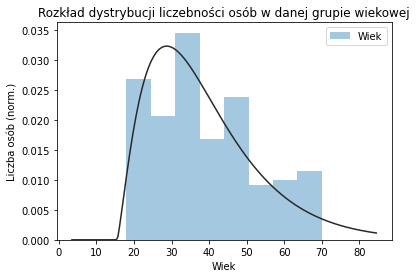

In [9]:
# AUC dla rozkładu ma wartość 1 ze względu na normalizację liczby osób w populacji dla danej podgrupy wiekowej
sns.distplot(dataset['Age'], 
             kde=False, 
             label='Wiek', 
             fit=stats.gamma)
plt.title('Rozkład dystrybucji liczebności osób w danej grupie wiekowej')
plt.xlabel('Wiek')
plt.ylabel('Liczba osób (norm.)')
plt.legend()
plt.show()

> Wynikiem rozkładu dystrybucji liczebności osób w danej grupie wiekowej jest zbiór lewostronnie skośny, co wynika z tego, że w posiadamy dane dotyczące tylko osób pełnoletnich. Ponadto zbiór pokrywa się z [piramidą wieku ludności](https://www.populationpyramid.net/poland/2019/), czyli nadreprezentowane są osoby w wieku produkcyjnym, a wraz ze wzrostem wieku liczbą przedstawicieli z danej grupy wiekowej spada.

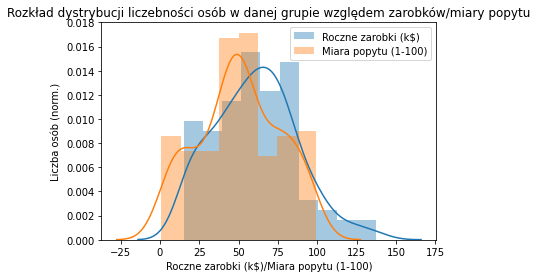

In [10]:
# AUC dla rozkładu ma wartość 1 ze względu na normalizację liczby osób w populacji dla danej podgrupy wiekowej
sns.distplot(dataset['Annual Income (k$)'], 
             label='Roczne zarobki (k$)')
sns.distplot(dataset['Spending Score (1-100)'],
             label='Miara popytu (1-100)')
plt.title('Rozkład dystrybucji liczebności osób w danej grupie względem zarobków/miary popytu')
plt.xlabel('Roczne zarobki (k$)/Miara popytu (1-100)')
plt.ylabel('Liczba osób (norm.)')
plt.legend()
plt.show()


> Zbiory powyższych argumentów posiadają charakter rozkładu normalnego.

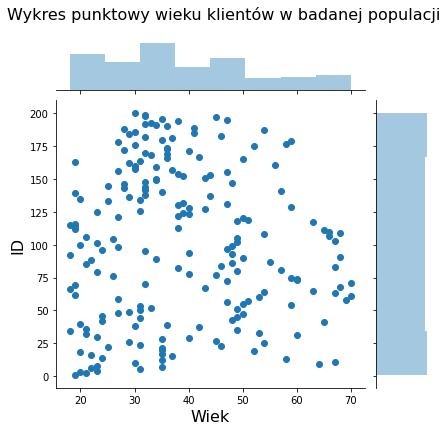

In [11]:
sns.jointplot(x="Age", 
              y="CustomerID", 
              data=dataset).set_axis_labels('Wiek', 
                                            'ID', 
                                            fontsize=16)
plt.subplots_adjust(top=0.9)
plt.suptitle('Wykres punktowy wieku klientów w badanej populacji', 
             fontsize = 16)
plt.show()

> Wykres punktowy wieku klientów w badanej populacji nie przedstawia wartości widocznie odbiegających od normy (anomalii).

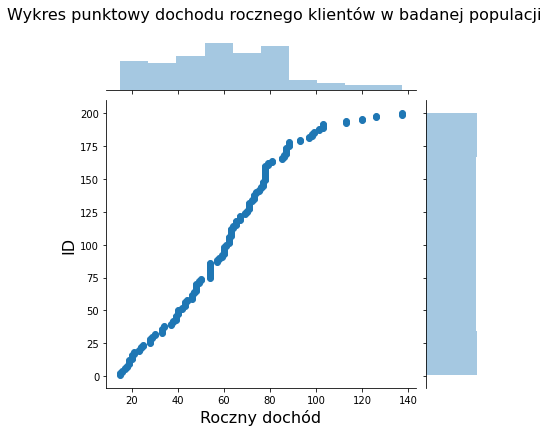

In [12]:
# wartość dochodu rocznego klientów rośnie wraz z indeksem
sns.jointplot(x="Annual Income (k$)", 
              y="CustomerID", 
              data=dataset).set_axis_labels('Roczny dochód', 
                                            'ID', 
                                            fontsize=16)
plt.subplots_adjust(top=0.9)
plt.suptitle('Wykres punktowy dochodu rocznego klientów w badanej populacji', 
             fontsize = 16)
plt.show()

> Widoczne są pojedyncze próbki dla klientów o najwyższych dochodach. Nie odrzucamy ich jednak z racji na zgodność takiej sytuacji z rzeczywistym rozkładem dochodów w społeczeństwie.

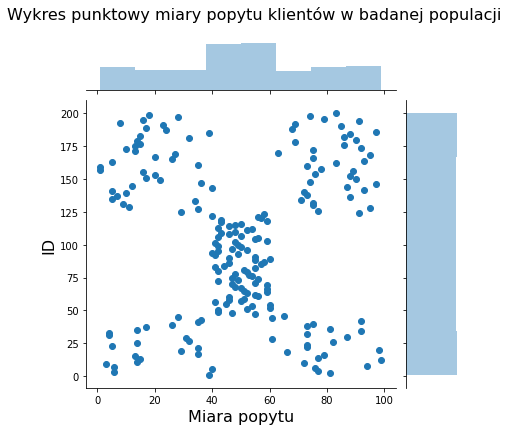

In [13]:
sns.jointplot(x="Spending Score (1-100)", 
              y="CustomerID",
              data=dataset).set_axis_labels('Miara popytu', 
                                            'ID', 
                                            fontsize=16)
plt.subplots_adjust(top=0.9)
plt.suptitle('Wykres punktowy miary popytu klientów w badanej populacji', 
             fontsize = 16)
plt.show()

> Widoczny jest charakterystyczny rozkład na pięć grup. Pomiędzy nimi nie wyróżniają się wartości dające się scharakteryzować jako anomalie.

#### **Krok 4: Analiza argumentów względem płci:**

Wykorzystywanie różnych rodzajów danych do klastrowania, tj. zarówno numerycznych (np. zarobki, wiek), jak i kategorycznych (np. płeć), jest pewnym wyzwaniem, gdyż centroidy w algorytmie K-średnich odwołują się do danych numerycznych. **Wobec tego, w naszej analizie nie grupujemy klientów z uwzględnieniem ich płci, tj. zmiennej jakościowej/kategorycznej.** Dzięki temu, finalna reprezentacja wyników pozwala na reprezentację graficzną na wykresie trójwymiarowym. Dane na temat płci będą wartościowe podczas konstrukcji klasyfikatora oferty indywidualnej.

```
# This is formatted as code
```

 Kilka kolejnych kroków opisuje rozkład płci naszych klientów w populacji badanej, oraz wieku i miary popytu względem płci.

In [14]:
# odczytanie proporcji kobiet i mężczyzn w zbiorze:
dataset['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [15]:
print("Procent kobiet w populacji klientów: ", (dataset[dataset['Gender'] == 'Female'].shape[0]/dataset['Gender'].shape[0])*100, '%')

Procent kobiet w populacji klientów:  56.00000000000001 %


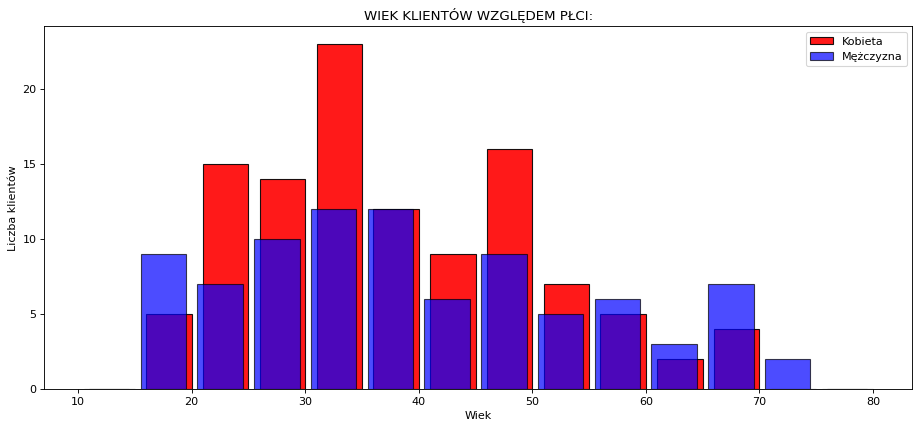

In [16]:
# histogram - liczba/wiek klientów względem płci:
bins = np.linspace(10, 80, 15)
shift = 0.5

figure(num=None, 
       figsize=(14, 6), 
       dpi=80, 
       facecolor='w', 
       edgecolor='k')

plt.hist('Age', 
         bins=bins+shift, 
         data=dataset[dataset['Gender'] == 'Female'], 
         color='red', 
         alpha=0.9, 
         label='Kobieta',
         histtype='bar',
         ec='black',
         rwidth=0.8)
plt.hist('Age', 
         bins=bins, 
         data=dataset[dataset['Gender'] == 'Male'], 
         color='blue', 
         alpha=0.7, 
         label='Mężczyzna',
         histtype='bar',
         ec='black',
         rwidth=0.8)
plt.title('WIEK KLIENTÓW WZGLĘDEM PŁCI:')
plt.xlabel('Wiek')
plt.ylabel('Liczba klientów')
plt.legend()
plt.show()

In [17]:
print("Procent kobiet w wieku 30-35 lat w populacji klientów obu płci: ", 
      (dataset.loc[(dataset['Gender'] == 'Female') & (dataset['Age'] >= 30) & (dataset['Age'] <= 35)].shape[0]/dataset.shape[0])*100, '%')
print("Procent kobiet w wieku 30-35 lat w żeńskiej populacji klientów: ", 
      (dataset.loc[(dataset['Gender'] == 'Female') & (dataset['Age'] >= 30) & (dataset['Age'] <= 35)].shape[0]/dataset[dataset['Gender'] == 'Female'].shape[0])*100, '%')
print("Procent mężczyzn w wieku 30-35 lat w populacji klientów obu płci: ", 
      (dataset.loc[(dataset['Gender'] == 'Male') & (dataset['Age'] >= 30) & (dataset['Age'] <= 35)].shape[0]/dataset.shape[0])*100, '%')
print("Procent mężczyzn w wieku 30-35 lat w męskiej populacji klientów: ", 
      (dataset.loc[(dataset['Gender'] == 'Male') & (dataset['Age'] >= 30) & (dataset['Age'] <= 35)].shape[0]/dataset[dataset['Gender'] == 'Male'].shape[0])*100, '%')

Procent kobiet w wieku 30-35 lat w populacji klientów obu płci:  14.000000000000002 %
Procent kobiet w wieku 30-35 lat w żeńskiej populacji klientów:  25.0 %
Procent mężczyzn w wieku 30-35 lat w populacji klientów obu płci:  7.5 %
Procent mężczyzn w wieku 30-35 lat w męskiej populacji klientów:  17.045454545454543 %


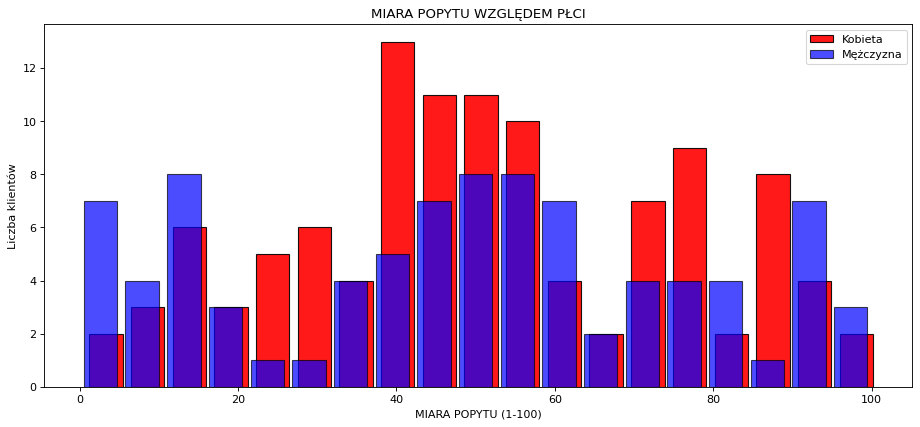

In [18]:
# histogram - liczba/miara popytu klientów względem płci:
bins = np.linspace(0, 100, 20)
shift=0.7

figure(num=None, 
       figsize=(14, 6), 
       dpi=80, 
       facecolor='w', 
       edgecolor='k')

plt.hist('Spending Score (1-100)',
         bins=bins+shift, 
         data=dataset[dataset['Gender'] == 'Female'], 
         color='red', 
         alpha=0.9, 
         label='Kobieta',
         histtype='bar',
         ec='black',
         rwidth=0.8)
plt.hist('Spending Score (1-100)', 
         bins=bins, 
         data=dataset[dataset['Gender'] == 'Male'], 
         color='blue', 
         alpha=0.7, 
         label='Mężczyzna',
         histtype='bar',
         ec='black',
         rwidth=0.8);
plt.title('MIARA POPYTU WZGLĘDEM PŁCI')
plt.xlabel('MIARA POPYTU (1-100)')
plt.ylabel('Liczba klientów')
plt.legend()
plt.show()

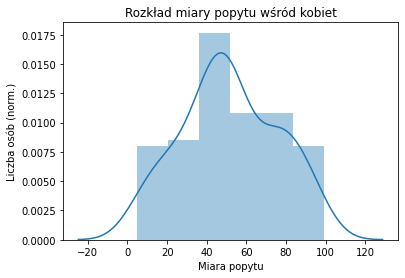

In [19]:
# AUC dla rozkładu ma wartość 1 ze względu na normalizację liczby osób w populacji dla danej podgrupy wiekowej
sns.distplot(dataset['Spending Score (1-100)'][dataset['Gender'] == 'Female'])
plt.title('Rozkład miary popytu wśród kobiet')
plt.xlabel('Miara popytu')
plt.ylabel('Liczba osób (norm.)')
plt.show()

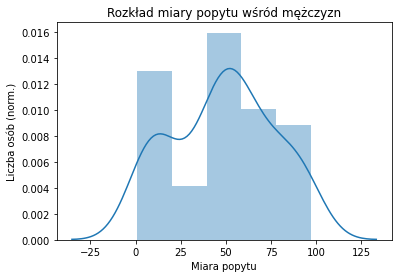

In [20]:
# AUC dla rozkładu ma wartość 1 ze względu na normalizację liczby osób w populacji dla danej podgrupy wiekowej
sns.distplot(dataset['Spending Score (1-100)'][dataset['Gender'] == 'Male'])
plt.title('Rozkład miary popytu wśród mężczyzn')
plt.xlabel('Miara popytu')
plt.ylabel('Liczba osób (norm.)')
plt.show()

> ##### Wnioski cząstkowe dla analizy argumentów względem płci:
* w badanej populacji klientów odwiedzających centrum handlowe dominują kobiety (56%)
* dla obu płci najwięcej klientów centrum ma około 30-35 lat, w tym wśród kobiet jest to aż 25% badanej populacji
* miara popytu dla kobiet ma charakter rozkładu normalnego, zaś wśród mężczyzn jest widoczna anomalia polegająca na relatywnie dużym udziale mężczyzn o niskim popycie podczas wizyty w centrum

#### **Krok 5: Algorytm klastrowania metodą K-średnich**

In [0]:
# Selekcja zmiennych do algorytmu klastrowania:
df = dataset[['Age', 
              'Annual Income (k$)',
              'Spending Score (1-100)']]

#### Estymacja optymalnej liczby klastrów:

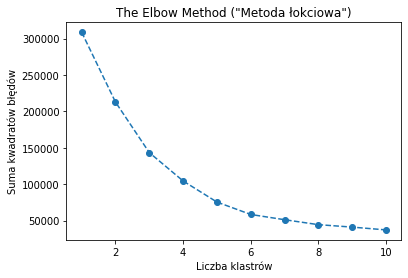

In [22]:
#Elbow method:
wb = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    wb.append(kmeans.inertia_)

plt.plot(range(1, 11), 
         wb, 
         linestyle='--', 
         marker='o')
plt.title('The Elbow Method ("Metoda łokciowa")')
plt.xlabel('Liczba klastrów')
plt.ylabel('Suma kwadratów błędów')
plt.show()

Metoda łokcia w naszym przypadku nie pozwala definitywnie określić liczby optymalnych klastrów, wykres wskazuje jedynie delikatne przełamanie dla wartości 5. Dlatego konieczne będzie zastosowanie metody The Silhouette Method.

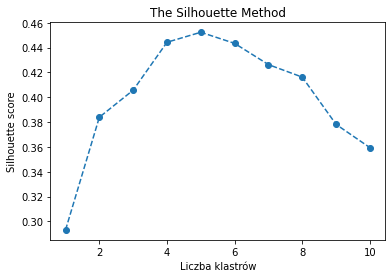

In [23]:
# Metoda Silhouette'a:

sil = []
kmax = 11

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df)
  labels = kmeans.labels_
  sil.append(silhouette_score(df, 
                              labels, 
                              metric = 'euclidean'))

plt.plot(range(1, 11), 
         sil, 
         linestyle='--', 
         marker='o')
plt.title('The Silhouette Method')
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette score')
plt.show()

#The Silhouette Score reaches its global maximum at the optimal k

Z powyższego wykresu jasno wynika, że optymalną liczbą klastrów będzie 5.

#### Parametryzacja modelu:

In [24]:
random.seed(1)

kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
km_pred = kmeans.predict(df)

df_copy = copy.copy(df) # deep copy: https://www.programiz.com/python-programming/shallow-deep-copy
df_copy['Cluster'] = [str(i) for i in km_pred]
df_copy

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,4
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,4
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


#### Wykres dla modelu:

In [25]:
wykres_kmean = px.scatter_3d(df_copy, 
                    x='Age', 
                    y='Annual Income (k$)', 
                    z='Spending Score (1-100)', 
                    color='Cluster') 
wykres_kmean.show()

#### Na podstawie naszej analizy, okazało się, że naszych klientów można podzielić na 5 kategorii:

* `Młodzi konsumenci` – jest to grupa najmłodszych klientów z grupy o najniższych zarobkach wydających sporo pieniędzy w centrum handlowym. Można przypuszczać, że centrum handlowe dla nich sposób na spędzanie wolnego czasu, umawiają się ze zanjomymi, chodzą na zakupu, do kina itp.

* `Pragmatycy z przymusu` – są to osoby z grupy tych o najmniejszych rocznych zarobkach, wydający najmniej w centrum, czyli przychodzą w konkretnym celu. Są to osoby głównie w wieku średnim oraz starsze.

* `Klasa średnia` – są to osoby charakteryzujące się zarobkami oraz wydatkami w centrum najbardziej zbliżonymi do średniej. Podobnie jak pragmatycy z wyboru są to osoby o bardzo zróżnicowanym wieku. Można przypuszczać, że jest to nasza klasa średnia.

* `Młodzi rozrzutni` – są to osoby młodsze o stosunkowo wysokich zarobkach które wydają w centrum.

* `Pragmatycy z wyboru` – osoby o zarobkach wyższych od średniej, raczej w średnim wieku, którzy jednocześnie mało wydają w naszym centrum. Możliwe, że wynikać to może z braku oferty w naszym centrum dla takich osób, potencjalny duży target który nie jest przez nas zagospodarowany.

Posiadając tak zdefinowane grupy, chcielibyśmy zbudować algorytm, który każdego klienta przyporządkowywałby do jednej z powyższych grup - da nam to możliwość skierowania ofert specjalnych odpowiednio przemyślanych pod kątem każdej z grup i zmaksymalizowania wyników sprzedażowych.

In [0]:
##Z racji na losowe i niepowtarzalne we wtórnych iteracjach wyniki przypisywania etykiet przez algorytm, 
##wyniki z bieżącej analizy zostaną zapisane do nowej wynikowej bazy danych po dodaniu słownie opisanych etykiet

#new_label = []

#for i in df_copy['Cluster']:
#  if i == "0":
#    new_label.append("Młodzi rozrzutni")
#  elif i == "1":
#    new_label.append("Młodzi konsumenci")
#  elif i == "2":
#    new_label.append("Pragmatycy z przymusu")
#  elif i == "3":
#    new_label.append("Klasa średnia")
#  elif i == "4":
#    new_label.append("Pragmatycy z wyboru")

#df_copy["Label"] = new_label

In [0]:
##Eksport wyników w postaci pliku .csv do dysku sieciowego w usłudze Google Drive:

#from google.colab import drive
#drive.mount('/content/drive')
#df_copy.to_csv('drive/My Drive/df.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Wyniki analizy z iteracji podczas wykonania projektu:
df_copy = pd.read_csv("df.csv")

In [0]:
#Zapis wyników do zmiennej wyniki_przed_norm w celu późniejszego porównania względem wyników po normalizacji danych:
wyniki_przed_norm = df_copy['Cluster']

#### **Krok 5.1: Normalizacja danych dla modelu i porównanie wyników**

Powyższe analizy oraz charakterystyka danych branych pod uwagę do grupowania (tj. ich zbliżony rząd wielkości) pozwalają na stwierdzenie, że normalizacja danych w naszym przypadku nie powinna mieć znaczącego wpływu na wyniki:
*   Popyt (1-100) 
*   Roczne zarobki (15-137)
*   Wiek (18-70)

Mimo to, sprawdźmy jakie rezultaty osiągniemy, gdy dane zostaną znormalizowane.

In [29]:
df_norm = copy.copy(df)
df_norm.columns = [0,1,2]

for i in range(3):
  df_norm[i] = [n/np.std(df_norm[i]) for n in df_norm[i]]

df_norm.columns = ['Age(Norm.)',
                   'Annual_Income(Norm.)',
                   'Spending_Score(Norm.)']
df_norm

,Age(Norm.),Annual_Income(Norm.),Spending_Score(Norm.)
0,1.363567,0.572541,1.514041
1,1.507100,0.572541,3.144546
2,1.435334,0.610711,0.232929
3,1.650634,0.610711,2.989260
4,2.224767,0.648880,1.552862
...,...,...,...
195,2.511834,4.580332,3.066903
196,3.229501,4.809348,1.087004
197,2.296534,4.809348,2.872795
198,2.296534,5.229212,0.698788


In [30]:
random.seed(1)

kmeans = KMeans(n_clusters=5)
kmeans.fit(df_norm)
km_pred = kmeans.predict(df_norm)

df_norm['Cluster'] = [str(i) for i in km_pred]

wykres_kmean_after_norm = px.scatter_3d(df_norm, 
                                        x='Age(Norm.)', 
                                        y='Annual_Income(Norm.)', 
                                        z='Spending_Score(Norm.)', 
                                        color='Cluster')
wykres_kmean_after_norm.show()

Otrzymany wykres pokazuje podobny rozkład, jednak mniej jednoznaczny w ocenie wzrokowej.

#### **Porównanie wyników przed i po normalizacji:**

In [0]:
# kolory i numery klastrów na wykresie zmieniają się przy każdej iteracji!
# wyniki z bieżącej analizy zostały eksportowane do pliku df_norm.csv

#new_label2 = []

#for i in df_val['po:']:
#  if i == "0":
#    new_label2.append("4")
#  elif i == "1": #
#    new_label2.append("3") #
#  elif i == "2":
#    new_label2.append("1") #
#  elif i == "3":
#    new_label2.append("2")
#  elif i == "4":
#    new_label2.append("0")

#df_norm.drop(columns=['Cluster'])
#df_norm['Cluster'] = new_label2
#df_norm.head()

#print('Procent odpowiadających sobie etykiet po normalizacji danych:',
#      (sum(df_val['przed:']==df_val['new_label'])/200)*100,'%')

## eksport wyników w postaci pliku .csv do dysku sieciowego w usłudze Google Drive:
#from google.colab import drive
#drive.mount('/content/drive')
#df_norm.to_csv('drive/My Drive/wyniki_analizy/df_norm.csv')

In [31]:
df_norm = pd.read_csv("df_norm.csv")
print('Procent odpowiadających sobie etykiet po normalizacji danych:',(sum(df_copy['Cluster']==df_norm['Cluster'])/200)*100,'%')

Procent odpowiadających sobie etykiet po normalizacji danych: 81.5 %


#### **Krok 6: Tworzenie losowego zbioru danych**

In [32]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [33]:
my_mean = 38.85
my_variance = (13.97)**2
random_numbers = [gauss(my_mean, math.sqrt(my_variance)) for i in range(300)]
random_numbers = [int(i) for i in random_numbers if (i >= 18)]
age_dummy = pd.Series(random_numbers)
age_dummy = age_dummy.dropna()

my_mean = 60.56
my_variance = (26.26)**2
random_numbers = [gauss(my_mean, math.sqrt(my_variance)) for i in range(300)]
random_numbers = [int(i) for i in random_numbers if (i >= 15)]
income_dummy = pd.Series(random_numbers)
income_dummy = income_dummy.dropna()

my_mean = 50.2
my_variance = (25.82)**2
random_numbers = [gauss(my_mean, math.sqrt(my_variance)) for i in range(300)]
random_numbers = [int(i) for i in random_numbers if (i >= 1) and (i <= 100)]
spend_score_dummy = pd.Series(random_numbers)
spend_score_dummy = spend_score_dummy.dropna()

age_dummy = age_dummy[0:200]
income_dummy =income_dummy[0:200]
spend_score_dummy = spend_score_dummy[0:200]
dummy_df = pd.DataFrame([age_dummy, income_dummy, spend_score_dummy])
dummy_df = dummy_df.transpose()
dummy_df.columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
dummy_df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.0000,200.000000,200.000000
mean,40.6300,62.740000,48.915000
std,12.2779,22.431636,23.397113
min,18.0000,16.000000,1.000000
25%,32.0000,45.000000,34.000000
50%,40.0000,61.500000,48.500000
75%,48.2500,78.250000,68.250000
max,76.0000,132.000000,97.000000


#### Przykład analizy metodą klastrowania K-mean losowo wygenerowanego zbioru danych:

In [34]:
random.seed(1)
kmeans.fit(dummy_df)
km_pred_dummy = kmeans.predict(dummy_df)

dummy_df_wykres = copy.copy(dummy_df)

dummy_df_wykres['Cluster'] = [str(i) for i in km_pred_dummy]

wykres_dummy = px.scatter_3d(dummy_df_wykres,
                             x='Age',
                             y='Annual Income (k$)', 
                             z='Spending Score (1-100)', 
                             color='Cluster')
wykres_dummy.show()

Klastrowanie losowo wygenerowanego zbioru danych daje zupełnie inne rezulaty niż dla danych prawdziwych, pomimo podobnych zakresów wartości. Brak charakterystycznego układu "X" z klastrem w centrum.


#### **Krok 7: Algorytmy nadzorowane klasyfikacji**
- Udało się za pomocą metody nienadzorowanej podzielić konsumentów na 5 grup. Następnie wykorzystano tak stworzoną klasyfikację jako zbiór treningowy do algorytmu nadzorowanego uczenia maszynowego. 
- Powyższy algorytm posiada zastosowanie komercyjne, umożliwia przypisywanie nowych klientów do grup konsumenckich na podstawie których kierowane są sprofilowane oferty marketingowe.

#### Model drzewa decyzyjnego:

In [35]:
data = pd.read_csv("df.csv")

random.seed(1)

X = data[['Age', 
          'Annual Income (k$)',
          'Spending Score (1-100)']]
y = data[['Label']]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=1, 
                                                    stratify=y)
mytree = DecisionTreeClassifier(criterion='gini',
                                max_depth=4, 
                                random_state=1)
mytree.fit(X_train, 
           y_train)

X_test_2 = dummy_df_wykres[['Age', 
                            'Annual Income (k$)',
                            'Spending Score (1-100)']]

y_pred = mytree.predict(X_test_2)

dummy_df_wykres_2 = copy.copy(X_test_2)

dummy_df_wykres_2['Cluster'] = [str(i) for i in y_pred]

wykres_dummy_2 = px.scatter_3d(dummy_df_wykres_2,
                             x='Age',
                             y='Annual Income (k$)', 
                             z='Spending Score (1-100)', 
                             color='Cluster')
wykres_dummy_2.show()

#### Model Lasu Losowego:

In [36]:
X = data[['Age', 
          'Annual Income (k$)',
          'Spending Score (1-100)']]

y = np.ravel(data[['Cluster']])

# Podział na zbiór testowy i uczący
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3) # 30% testowy, 70% treningowy 
clf=RandomForestClassifier(n_estimators=50)

#Uczymy model
clf.fit(X_train,
        y_train)

y_pred=clf.predict(X_test)

# Jak często klasyfikator daje poprawne wyniki?
print("Poprawność predykcji:",round(accuracy_score(y_test, y_pred),2)*100,"%")

Poprawność predykcji: 98.0 %


Powyższy wynik sugeruje, że nasz model lasu losowego powienien dawać przystępną jakość przewidywania grupy klienta (mając na uwadzę relatywnie niewielką ilość danych wykorzystaną do uczenia).

In [39]:
#Opis nowego klienta:
wiek = 60
zarobki = 20
popyt = 20

#Predykcja klastra dla klienta:
przewidywany_klaster = clf.predict([[wiek, zarobki, popyt]])
print("Osoba o wieku", wiek, "lat, zarobkach rocznych", zarobki,
      "k$, oraz popycie", popyt, "powinna należeć do grupy:",)
print(data.loc[data['Cluster'] == int(przewidywany_klaster)].iat[0,-1])

Osoba o wieku 60 lat, zarobkach rocznych 20 k$, oraz popycie 20 powinna należeć do grupy:
Pragmatycy z przymusu


Powyższy wynik wydaje się być zgodny z oczekiwaniem.

# **Podsumowanie**

W projekcie udało się zrealizować nasze podstawowe założenia:
- podział grup klientów centrum handlowego w oparciu o ich wiek, zarobki oraz miarę popytu (tj. rozrzutność)
- stworzenie algorytmu przypisującego nowych klientów do odpowiedniej z grup

Klasyfikator na podstawie grupowania nienadzorowanego umożliwia dopasowanie zdefiniowanej grupy dla klienta. W połączeniu grupy z płcią, umożliwia to np.:
- zaoferowanie programu lojalnościowego opartego o zbieranie punktów klientowi o niskim popycie podczas wizyty
- oferowanie rozbudowanych drogich zestawów lub pojedynczych kosmetyków dla kobiet lub meżczyzn, zależnie od ich charakterystyki

Modele predykcyjne mogą być niezwykle przydatne w marketingu i sprzedaży dla centrów handlowych i aplikacyjne w sektorach powiązanych. 

Pomysłem na rozbudowanie projektu byłoby stworzenie uniwersalnego narzędzia marketingowego - zdolnego do grupowania klientów z różnych branż, w oparciu o dane o zróżnicowanym charakterze.
